In [ ]:
"""importing libraries"""
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.preprocessing import image

%tensorflow_version 2.x
print("We are now working with tensorflow version: ",tf.__version__)

We are now working with tensorflow version:  2.2.0


Using TensorFlow backend.


In [ ]:
"""IMPORT DATASET"""
import zipfile
import os
zip_path='/content/drive/My Drive/Fruits/jetson-fruits-classification-master.zip'
zip_ref = zipfile.ZipFile(zip_path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
train_path='/tmp/jetson-fruits-classification-master/fruits-dataset'

In [ ]:
classes=['apple','pomegranate','beetroot','dates','mango','orange']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (229,229))     



Found 600 images belonging to 6 classes.


In [ ]:
conv_base=InceptionV3(input_shape=(229,229,3),include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 5s 0us/step


In [ ]:
for layer in conv_base.layers:
  layer.trainable=False

In [ ]:
x=conv_base.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
predictions=tf.keras.layers.Dense(6,activation='softmax')(x)
model=tf.keras.Model(conv_base.input,predictions)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
r = model.fit_generator(train_generator,epochs=25,steps_per_epoch=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
10/10 [==============================] - 4s 430ms/step - loss: 1.3505 - accuracy: 0.4750
Epoch 2/25
10/10 [==============================] - 5s 469ms/step - loss: 0.5113 - accuracy: 0.9050
Epoch 3/25
10/10 [==============================] - 5s 465ms/step - loss: 0.2191 - accuracy: 0.9750
Epoch 4/25
10/10 [==============================] - 5s 467ms/step - loss: 0.1989 - accuracy: 0.9700
Epoch 5/25
10/10 [==============================] - 5s 472ms/step - loss: 0.1100 - accuracy: 0.9800
Epoch 6/25
10/10 [==============================] - 5s 471ms/step - loss: 0.0895 - accuracy: 0.9900
Epoch 7/25
10/10 [==============================] - 5s 464ms/step - loss: 0.0863 - accuracy: 0.9850
Epoch 8/25
10/10 [==============================] - 5s 469ms/step - loss: 0.0700 - accuracy: 0.9950
Epoch 9/25
10/10 [==============================] - 5s 475ms/step - loss: 0.0565 - accuracy: 0.9900
Epoch 10/25
10/10 [=====

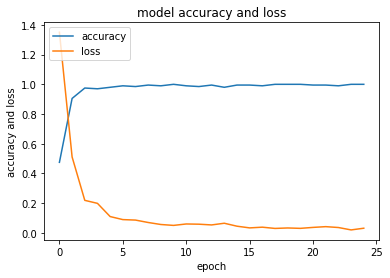

In [ ]:
# summarize history for accuracy
plt.plot(r.history['accuracy'])
plt.plot(r.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
test_img='/tmp/jetson-fruits-classification-master/test-images/'
img_path='/tmp/jetson-fruits-classification-master/test-images/apple.jpeg'

In [ ]:
print(test_img)
print(img_path)

/tmp/jetson-fruits-classification-master/test-images/
/tmp/jetson-fruits-classification-master/test-images/apple.jpeg


In [ ]:
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


In [ ]:
# predicting images
img = image.load_img('/tmp/jetson-fruits-classification-master/test-images/apple.jpeg', target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

# predicting multiple images at once
img = image.load_img('/tmp/jetson-fruits-classification-master/test-images/mango.jpeg', target_size=(150,150))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
print(classes)
print(classes[0])
print(classes[0][0])

[[0.0000000e+00 2.7582104e-33 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[[0.0000000e+00 2.7582104e-33 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
[0.0000000e+00 2.7582104e-33 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
0.0


In [ ]:
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


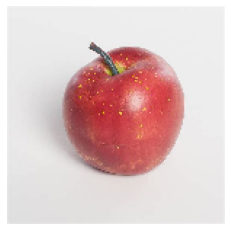

(1, 150, 150, 3)
[[9.9996793e-01 5.4188297e-07 1.0926413e-05 1.4421586e-07 1.7868453e-05
  2.4973710e-06]]


In [ ]:
# load a single image
new_image = load_image(img_path)
print(new_image.shape)

# check prediction
pred = model.predict(new_image)
print(pred)

In [ ]:
classes = train_generator.class_indices 
print(classes) 

{'Apple': 0, 'Beetroot': 1, 'Dates': 2, 'Mango': 3, 'Orange': 4, 'Pomegranate': 5}
